# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# memasukan library yang akan digunakan untuk membandingkan tiga model machine learning untuk prediksi diabetes.
# Model yang digunakan yaitu Decision Tree, Random Forest, dan K-Nearest Neighbors (KNN).

# Import Dataset


In [ ]:
url = "https://raw.githubusercontent.com/OoMyGit/Dataset-DataMining-W6/refs/heads/main/diabetes.csv"

df = pd.read_csv(url)
df.head()

# Code diatas ini berfungsi untuk memasukan data dari github yang berformat csv ke dalam machine learning,
# dan ditampilkan sebanyak 5 data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()
# menampilkan ringkasan informasi tentang DataFrame, termas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Exploratory Data Analysis (EDA)

In [ ]:
df.describe()

# df.describe() menampilkan statistik deskriptif dari data numerik dalam DataFrame,
# seperti mean, standar deviasi, nilai minimum, dan maksimum.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
print(df.isnull().sum())

# print(df.isnull().sum()) menampilkan jumlah nilai null (missing values) di setiap kolom DataFrame.

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


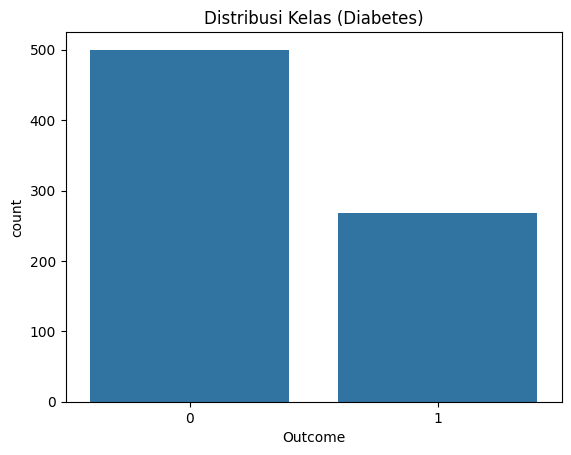

In [ ]:
sns.countplot(x='Outcome', data=df)
plt.title('Distribusi Kelas (Diabetes)')
plt.show()

# Kode tersebut membuat countplot untuk menampilkan distribusi kelas 'Outcome' (Diabetes)
# dalam dataset menggunakan Seaborn dan Matplotlib.

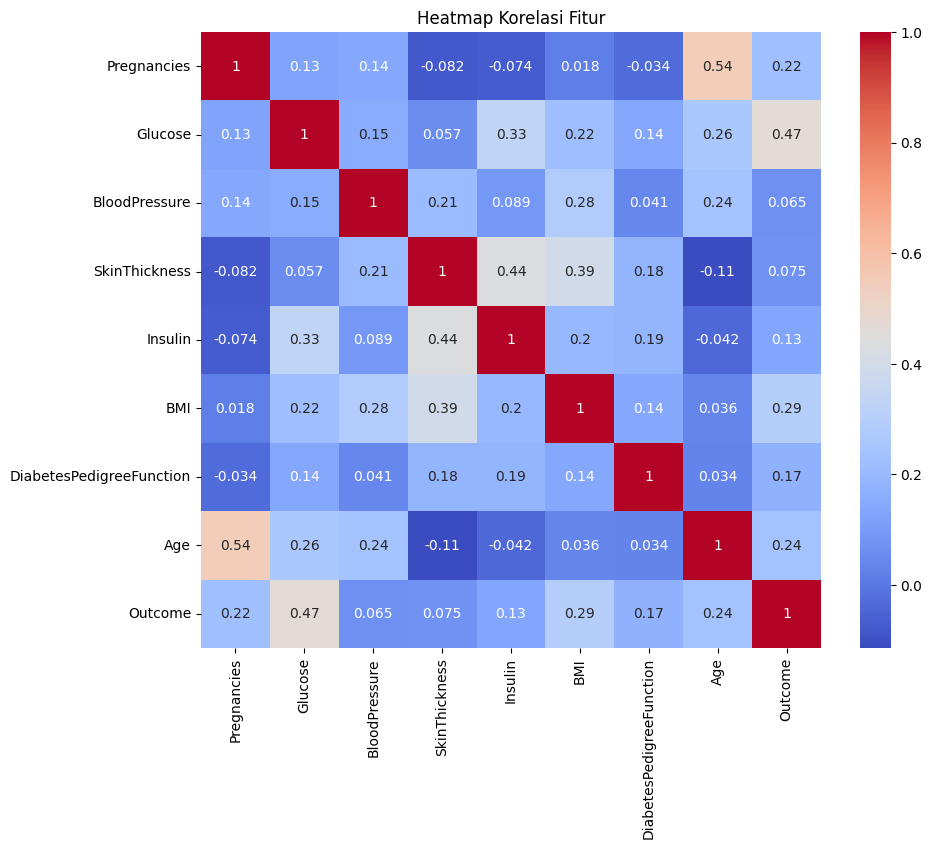

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Fitur')
plt.show()
# Kode tersebut membuat heatmap untuk memvisualisasikan korelasi antar
# fitur dalam dataset menggunakan Seaborn dan Matplotlib.

# Preprocessing dan Split Data

In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Ukuran Data Train: {X_train.shape}")
print(f"Ukuran Data Test: {X_test.shape}")

# Kode tersebut memisahkan fitur (X) dan target (y), kemudian membagi data menjadi data latih (train)
# dan data uji (test) dengan rasio 70:30 dan menampilkan ukuran masing-masing data.

Ukuran Data Train: (537, 8)
Ukuran Data Test: (231, 8)


# Decision Tree

### Defining the Model using Entropy


In [ ]:
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_entropy.fit(X_train, y_train)

# Kode tersebut membuat model Decision Tree dengan kriteria 'entropy', menetapkan
# random state, dan melatih model menggunakan data latih (X_train dan y_train).

DecisionTreeClassifier(criterion='entropy', random_state=42)

### Predict the Test Set Results

In [ ]:
y_pred_entropy = dt_entropy.predict(X_test)
# Kode tersebut menggunakan model Decision Tree yang sudah dilatih untuk melakukan prediksi
# pada data uji (X_test) dan menyimpan hasilnya dalam variabel y_pred_entropy.

### Check Accuracy Score


In [ ]:
acc_entropy = accuracy_score(y_test, y_pred_entropy)
print(f"Akurasi dengan Entropy: {acc_entropy:.2f}")

# Kode tersebut menghitung akurasi model Decision Tree dengan membandingkan hasil
# prediksi (y_pred_entropy) dengan nilai sebenarnya (y_test) dan menampilkan hasilnya.

Akurasi dengan Entropy: 0.73


### Check for Overfitting and Underfitting

In [ ]:
train_score_entropy = dt_entropy.score(X_train, y_train)
test_score_entropy = dt_entropy.score(X_test, y_test)

print(f"Akurasi pada train set dengan Entropy: {train_score_entropy:.2f}")
print(f"Akurasi pada test set dengan Entropy: {test_score_entropy:.2f}")

# Kode tersebut menghitung dan menampilkan akurasi model Decision Tree pada data latih (train set)
# dan data uji (test set) untuk mengevaluasi overfitting atau underfitting.

Akurasi pada train set dengan Entropy: 1.00
Akurasi pada test set dengan Entropy: 0.73


### Visualize Decision Trees

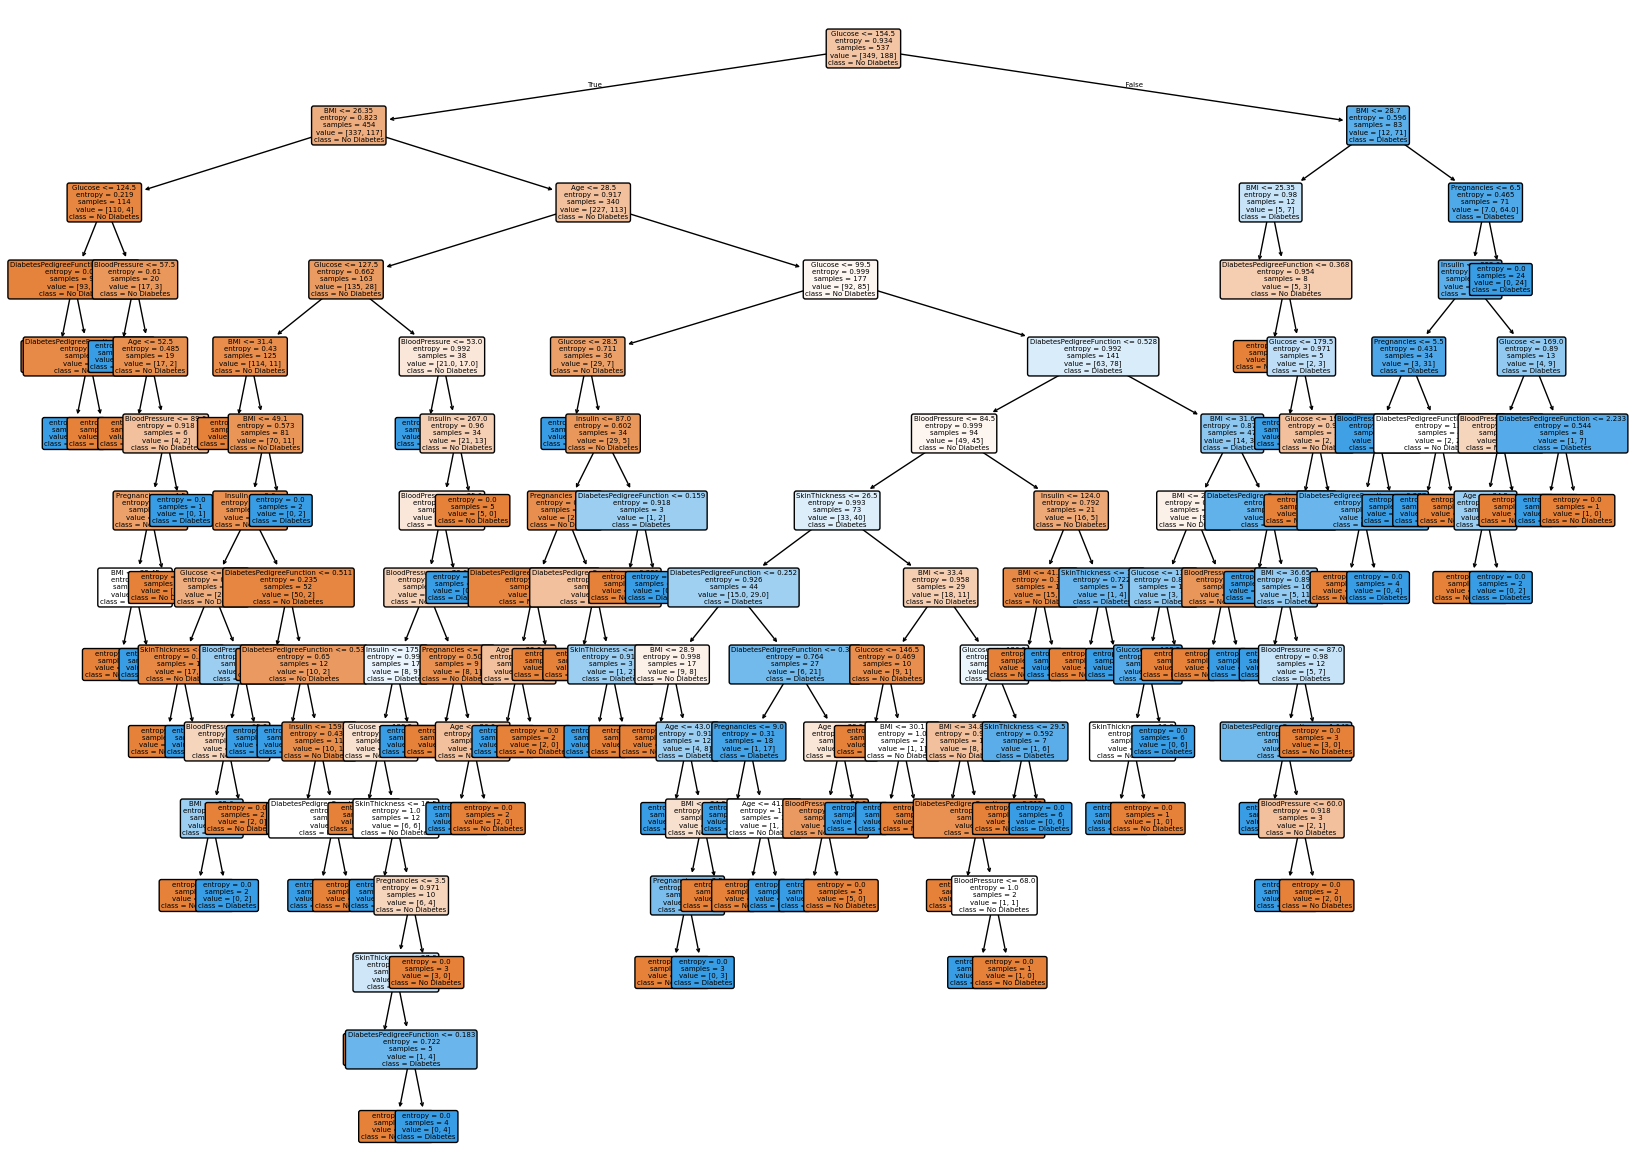

In [ ]:
plt.figure(figsize=(20, 15))
tree.plot_tree(dt_entropy, filled=True, feature_names=X.columns, class_names=["No Diabetes", "Diabetes"], fontsize=5,  max_depth=None, rounded=True)
plt.show()

# Kode tersebut memvisualisasikan Decision Tree yang sudah dilatih dengan menampilkan struktur pohon,
# fitur, kelas, dan detail lainnya menggunakan Matplotlib.

### Confusion Matrix

In [ ]:
cm_entropy = confusion_matrix(y_test, y_pred_entropy)
print("Confusion Matrix (Entropy):")
print(cm_entropy)
# Kode tersebut membuat dan menampilkan confusion matrix untuk mengevaluasi
# performa model Decision Tree dengan membandingkan hasil prediksi dan nilai sebenarnya.


Confusion Matrix (Entropy):
[[118  33]
 [ 30  50]]


### Classifications Report


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred_entropy))

# Kode tersebut menampilkan classification report yang berisi metrik evaluasi seperti
# precision, recall, F1-score, dan support untuk setiap kelas dalam prediksi model Decision Tree.

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       151
           1       0.60      0.62      0.61        80

    accuracy                           0.73       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.73      0.73      0.73       231



### Results and Conclusion

In [ ]:
print("Kesimpulan:")
print(f"Akurasi model dengan Entropy: {acc_entropy:.2f}")

# Kode tersebut menampilkan kesimpulan dengan mencetak akurasi model Decision Tree yang telah dihitung sebelumnya.

Kesimpulan:
Akurasi model dengan Entropy: 0.73


# Random Forest


### Model Random Forest

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Kode tersebut membuat model Random Forest, menetapkan random state, dan melatih model
# menggunakan data latih (X_train dan y_train).

RandomForestClassifier(random_state=42)

### Prediksi Random Forest


In [ ]:
y_pred_rf = rf_model.predict(X_test)

# Kode tersebut menggunakan model Random Forest yang sudah dilatih untuk melakukan prediksi pada
# data uji (X_test) dan menyimpan hasilnya dalam variabel y_pred_rf.

### Evaluasi Random Forest

In [ ]:
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
# Kode tersebut menampilkan classification report dan confusion matrix untuk
# mengevaluasi performa model Random Forest.

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       151
           1       0.64      0.66      0.65        80

    accuracy                           0.75       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.76      0.75      0.75       231

[[121  30]
 [ 27  53]]


# K-Nearest Neighbors (KNN)


### Model K-Nearest Neighbors (KNN)



In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Kode tersebut membuat model K-Nearest Neighbors dengan menentukan jumlah tetangga terdekat (n_neighbors=5),
# dan melatih model menggunakan data latih (X_train dan y_train).

KNeighborsClassifier()

### Prediksi K-Nearest Neighbors (KNN)

In [ ]:
y_pred_knn = knn_model.predict(X_test)
# Kode tersebut menggunakan model KNN yang sudah dilatih untuk melakukan
# prediksi pada data uji (X_test) dan menyimpan hasilnya dalam variabel y_pred_knn.

### Evaluasi K-Nearest Neighbors (KNN)


In [ ]:
print("KNN Performance:")
print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))

# Kode tersebut menampilkan classification report dan confusion matrix untuk mengevaluasi performa model KNN.

KNN Performance:
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       151
           1       0.55      0.56      0.56        80

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231

[[114  37]
 [ 35  45]]


# Perbandingan


In [ ]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print(f"Akurasi Decision Tree: {accuracy_dt:.2f}")
print(f"Akurasi Random Forest: {accuracy_rf:.2f}")
print(f"Akurasi KNN: {accuracy_knn:.2f}")

# Random Forest memiliki akurasi tertinggi (75%), diikuti oleh Decision Tree (70%) dan KNN (69%).

# Kode tersebut menghitung dan menampilkan akurasi dari ketiga model (Decision Tree, Random Forest, dan KNN)
#untuk membandingkan performanya.

Akurasi Decision Tree: 0.70
Akurasi Random Forest: 0.75
Akurasi KNN: 0.69
